<a href="https://colab.research.google.com/github/Fabio-Morganti/Progetto-Python-Data-Science/blob/main/Progetto_Python_classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

from sklearn.preprocessing import OrdinalEncoder

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Progetto Python/dataset_balanced.csv')
df.head()

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Source,Severity,Start_Time,Street,Side,City,County,State,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C),Durations,Start_Date,Orario,Year,Month,Day,Day_of_week,Season
0,39.063148,-84.032608,100.0,29.67,10.0,3.5,MapQuest,2,06:49:27,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
1,39.627781,-84.188354,89.0,29.65,6.0,3.5,MapQuest,2,07:39:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
2,39.758274,-84.230507,100.0,29.66,7.0,3.5,MapQuest,2,07:59:35,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
3,39.952812,-83.119293,93.0,29.64,5.0,5.8,MapQuest,3,08:14:42,Outerbelt S,R,Columbus,Franklin,OH,US/Eastern,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.6,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
4,39.790760,-84.241547,89.0,29.65,10.0,5.8,MapQuest,2,08:37:07,Salem Ave,L,Dayton,Montgomery,OH,US/Eastern,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno


In [ ]:
df = df.drop(['City', 'Start_Time', 'Street', 'Source', 'County', 'Weather_Timestamp', 'Start_Date', 'Day'], axis=1)

In [ ]:
df.shape

(1247246, 35)

In [ ]:
columns= ['Amenity',	'Bump',	'Crossing',	'Give_Way',	'Junction',	'No_Exit',	'Railway',	'Roundabout',	'Station',	'Stop',	'Traffic_Calming',	'Traffic_Signal']

In [ ]:
for column in columns:
  df[column]=df[column].apply(lambda x:(str (x)))

In [ ]:
df['Severity'] = df['Severity'].apply(lambda x:(str (x)))


In [ ]:
df.dtypes

Start_Lat                float64
Start_Lng                float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Speed(mph)          float64
Severity                  object
Side                      object
State                     object
Timezone                  object
Wind_Direction            object
Weather_Condition         object
Amenity                   object
Bump                      object
Crossing                  object
Give_Way                  object
Junction                  object
No_Exit                   object
Railway                   object
Roundabout                object
Station                   object
Stop                      object
Traffic_Calming           object
Traffic_Signal            object
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
Temperature(C)           float64
Durations                float64
Orario    

In [ ]:
df_object = df.select_dtypes(include='object')
df_other = df.select_dtypes(exclude='object')

In [ ]:
df_object.head()

,Severity,Side,State,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Orario,Day_of_week,Season
0,2,R,OH,US/Eastern,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,Mattina,Lunedi,inverno
1,2,R,OH,US/Eastern,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,Mattina,Lunedi,inverno
2,2,R,OH,US/Eastern,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mattina,Lunedi,inverno
3,3,R,OH,US/Eastern,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mattina,Lunedi,inverno
4,2,L,OH,US/Eastern,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,Mattina,Lunedi,inverno


In [ ]:
df_other.head()

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Temperature(C),Durations,Year,Month
0,39.063148,-84.032608,100.0,29.67,10.0,3.5,4.0,30.0,2016,2
1,39.627781,-84.188354,89.0,29.65,6.0,3.5,4.0,30.0,2016,2
2,39.758274,-84.230507,100.0,29.66,7.0,3.5,2.0,30.0,2016,2
3,39.952812,-83.119293,93.0,29.64,5.0,5.8,3.6,30.0,2016,2
4,39.790760,-84.241547,89.0,29.65,10.0,5.8,4.0,30.0,2016,2


In [ ]:
enc = OrdinalEncoder()
df_obj = pd.DataFrame(enc.fit_transform(df_object))
df_obj.columns = df_object.columns

In [ ]:
df_obj.head()

,Severity,Side,State,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Orario,Day_of_week,Season
0,1.0,1.0,33.0,1.0,16.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0
1,1.0,1.0,33.0,1.0,16.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,1.0,1.0,33.0,1.0,22.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3,2.0,1.0,33.0,1.0,21.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
4,1.0,0.0,33.0,1.0,10.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


In [ ]:
df_encoded = pd.concat([df_obj, df_other], axis=1, sort=False)
df_encoded.head()

,Severity,Side,State,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Orario,Day_of_week,Season,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Temperature(C),Durations,Year,Month
0,1.0,1.0,33.0,1.0,16.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,39.063148,-84.032608,100.0,29.67,10.0,3.5,4.0,30.0,2016,2
1,1.0,1.0,33.0,1.0,16.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,39.627781,-84.188354,89.0,29.65,6.0,3.5,4.0,30.0,2016,2
2,1.0,1.0,33.0,1.0,22.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,39.758274,-84.230507,100.0,29.66,7.0,3.5,2.0,30.0,2016,2
3,2.0,1.0,33.0,1.0,21.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,39.952812,-83.119293,93.0,29.64,5.0,5.8,3.6,30.0,2016,2
4,1.0,0.0,33.0,1.0,10.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,39.790760,-84.241547,89.0,29.65,10.0,5.8,4.0,30.0,2016,2


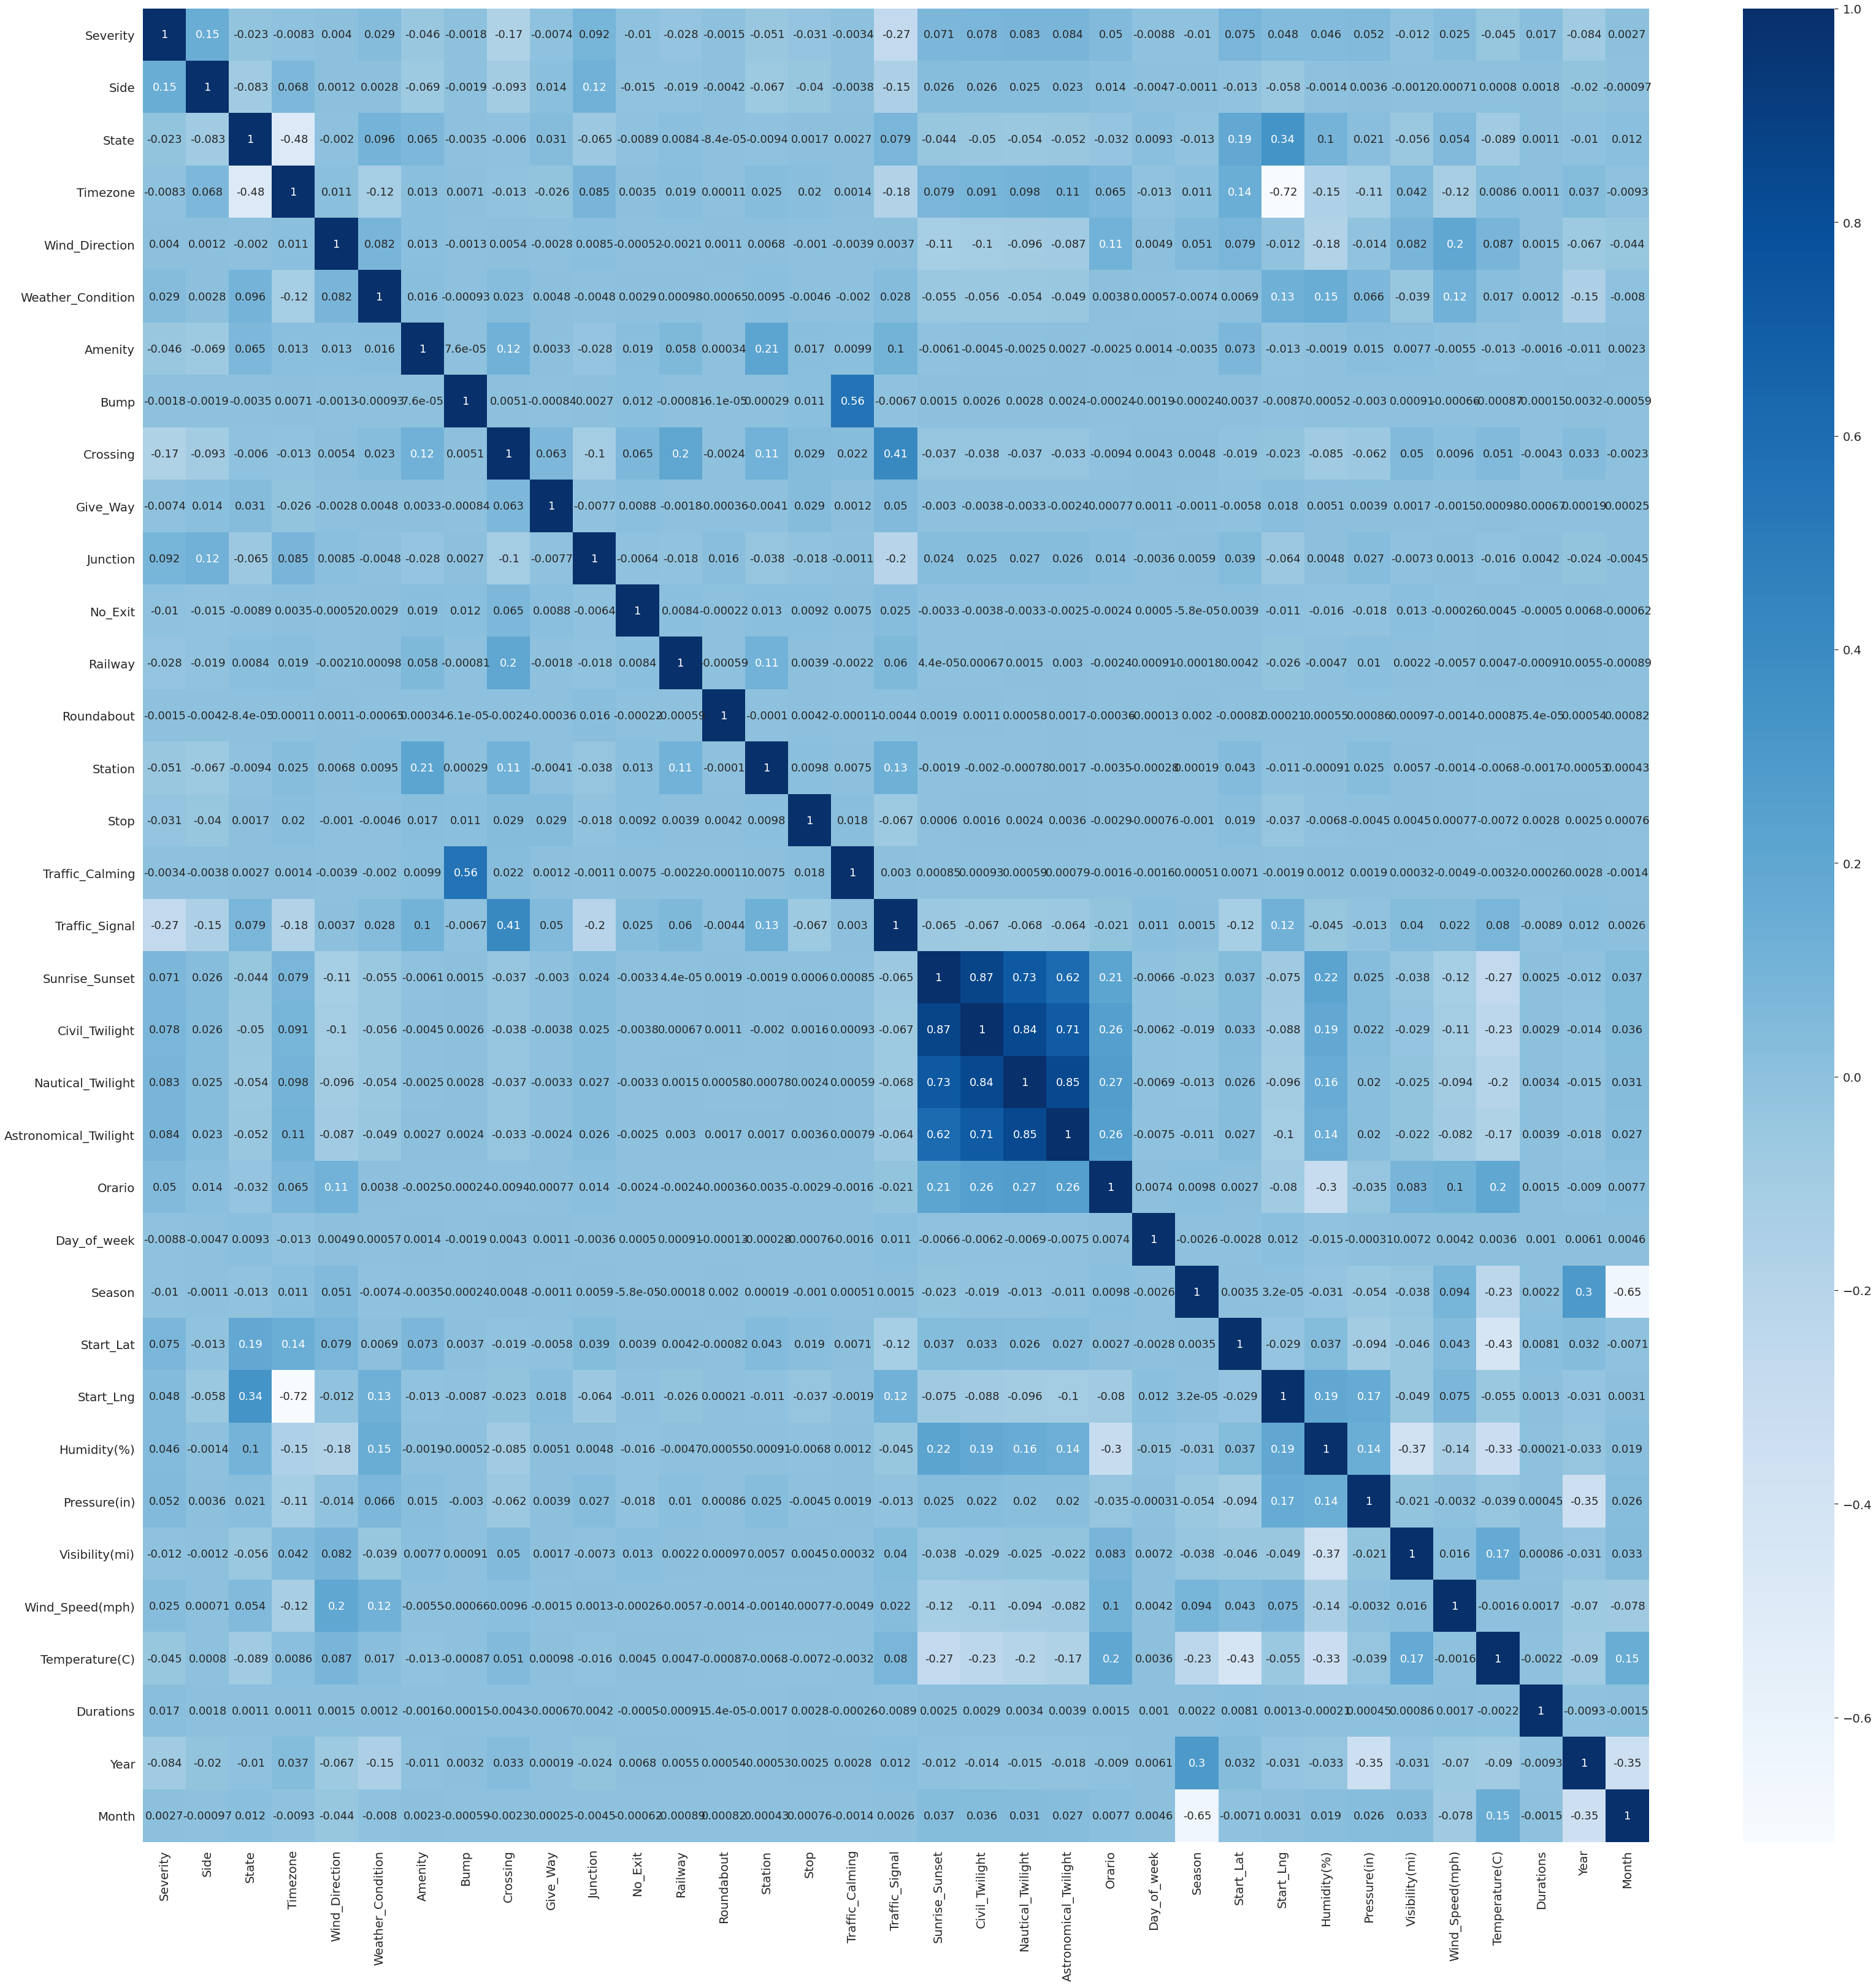

In [ ]:
plt.figure(figsize=(55,55))
ax = sns.heatmap(df_encoded[df_encoded.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})
plt.savefig('/content/drive/MyDrive/Progetto Python/Correlazione.png')

In [ ]:
df_encoded = df_encoded.drop(['Civil_Twilight', 'Nautical_Twilight'], axis=1)

In [ ]:
names = df_encoded.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(scaled_d)
#df_normalized.columns = names
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.333333,1.0,0.6875,0.333333,0.695652,0.621359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.666667,0.593479,0.713122,1.000000,0.513687,0.071429,0.004254,0.498803,0.000043,0.0,0.090909
1,0.333333,1.0,0.6875,0.333333,0.695652,0.592233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.666667,0.616576,0.710386,0.888889,0.513340,0.042857,0.004254,0.498803,0.000043,0.0,0.090909
2,0.333333,1.0,0.6875,0.333333,0.956522,0.621359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.621915,0.709645,1.000000,0.513514,0.050000,0.004254,0.490822,0.000043,0.0,0.090909
3,0.666667,1.0,0.6875,0.333333,0.913043,0.679612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.629873,0.729167,0.929293,0.513167,0.035714,0.007049,0.497207,0.000043,0.0,0.090909
4,0.333333,0.0,0.6875,0.333333,0.434783,0.592233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.666667,0.623243,0.709451,0.888889,0.513340,0.071429,0.007049,0.498803,0.000043,0.0,0.090909


In [ ]:
df_normalized.columns = names
df_normalized.head()

,Severity,Side,State,Timezone,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Astronomical_Twilight,Orario,Day_of_week,Season,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Temperature(C),Durations,Year,Month
0,0.333333,1.0,0.6875,0.333333,0.695652,0.621359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.666667,0.593479,0.713122,1.000000,0.513687,0.071429,0.004254,0.498803,0.000043,0.0,0.090909
1,0.333333,1.0,0.6875,0.333333,0.695652,0.592233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.666667,0.616576,0.710386,0.888889,0.513340,0.042857,0.004254,0.498803,0.000043,0.0,0.090909
2,0.333333,1.0,0.6875,0.333333,0.956522,0.621359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.621915,0.709645,1.000000,0.513514,0.050000,0.004254,0.490822,0.000043,0.0,0.090909
3,0.666667,1.0,0.6875,0.333333,0.913043,0.679612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.629873,0.729167,0.929293,0.513167,0.035714,0.007049,0.497207,0.000043,0.0,0.090909
4,0.333333,0.0,0.6875,0.333333,0.434783,0.592233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.666667,0.623243,0.709451,0.888889,0.513340,0.071429,0.007049,0.498803,0.000043,0.0,0.090909


In [ ]:
df_normalized['Traffic_Signal'] = df_normalized['Traffic_Signal'].apply(lambda x:(int (x)))


In [ ]:
df_normalized.dtypes

Severity                 float64
Side                     float64
State                    float64
Timezone                 float64
Wind_Direction           float64
Weather_Condition        float64
Amenity                  float64
Bump                     float64
Crossing                 float64
Give_Way                 float64
Junction                 float64
No_Exit                  float64
Railway                  float64
Roundabout               float64
Station                  float64
Stop                     float64
Traffic_Calming          float64
Traffic_Signal             int64
Sunrise_Sunset           float64
Astronomical_Twilight    float64
Orario                   float64
Day_of_week              float64
Season                   float64
Start_Lat                float64
Start_Lng                float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Speed(mph)          float64
Temperature(C)           float64
Durations 

In [ ]:
df_normalized.to_csv('/content/drive/MyDrive/Progetto Python/dataset_normalized.csv', index = False, header=True)

In [ ]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(df_normalized.drop('Traffic_Signal', axis=1), df_normalized['Traffic_Signal'], test_size=0.2, random_state=rs)
#stratify=df_normalized['Traffic_Signal']------domandare a luca se conviene usarlo nonostante abbiamo valori delle classi predetti buoni

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(997796, 32)
(249450, 32)
(997796,)
(249450,)


In [ ]:

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    #SVC(probability=True),
    LinearDiscriminantAnalysis(),
    AdaBoostClassifier((DecisionTreeClassifier(random_state=rs)), random_state=rs, learning_rate=0.1),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state=rs),
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=10) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []


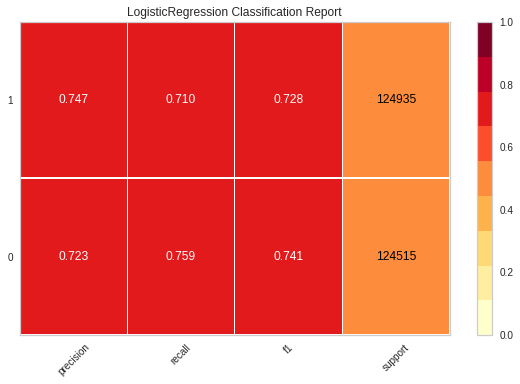

Accuracy: 0.73 	 ---> LogisticRegression 


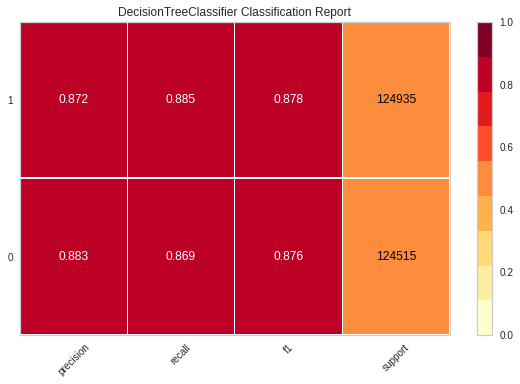

Accuracy: 0.88 	 ---> DecisionTreeClassifier 


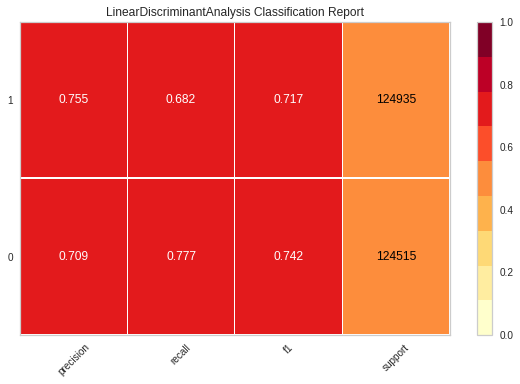

Accuracy: 0.73 	 ---> LinearDiscriminantAnalysis 


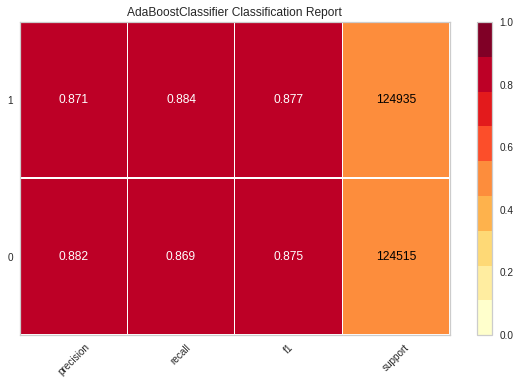

Accuracy: 0.88 	 ---> AdaBoostClassifier 


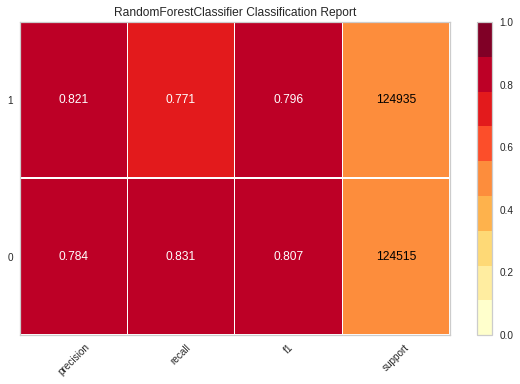

Accuracy: 0.8 	 ---> RandomForestClassifier 


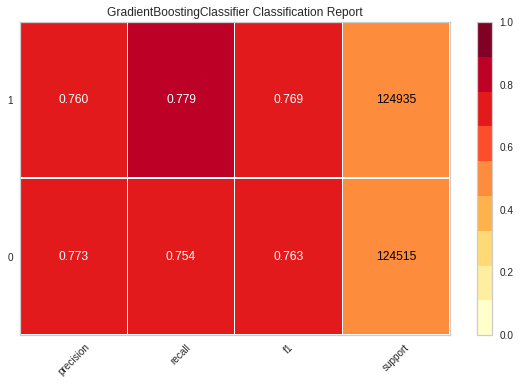

Accuracy: 0.77 	 ---> GradientBoostingClassifier 


<Figure size 576x396 with 0 Axes>

In [ ]:

# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred

    classes = [0,1]
    visualizer = ClassificationReport(model, classes=classes, support=True)

    visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
    visualizer.score(x_test, y_test)        # Evaluate the model on the test data
    visualizer.poof()                       # Finalize and show the figure
    plt.savefig('/content/drive/MyDrive/Progetto Python/Report '+name+'.png')

    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

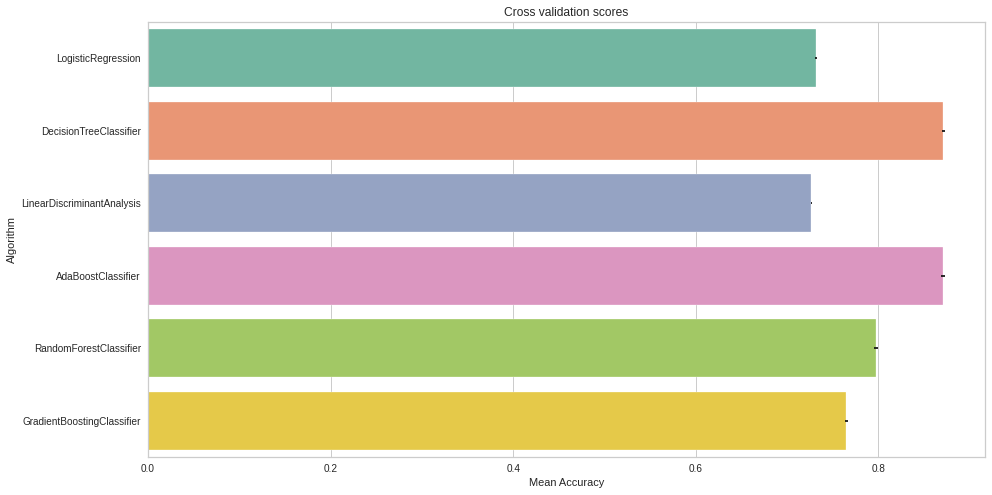

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(15,8))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")
plt.savefig('/content/drive/MyDrive/Progetto Python/Cross validation.png')

In [ ]:
cv_res.head()

,CrossValMeans,CrossValerrors,Algorithm
0,0.731151,0.001002,LogisticRegression
1,0.870948,0.001805,DecisionTreeClassifier
2,0.726490,0.000823,LinearDiscriminantAnalysis
3,0.870872,0.002052,AdaBoostClassifier
4,0.797433,0.001973,RandomForestClassifier


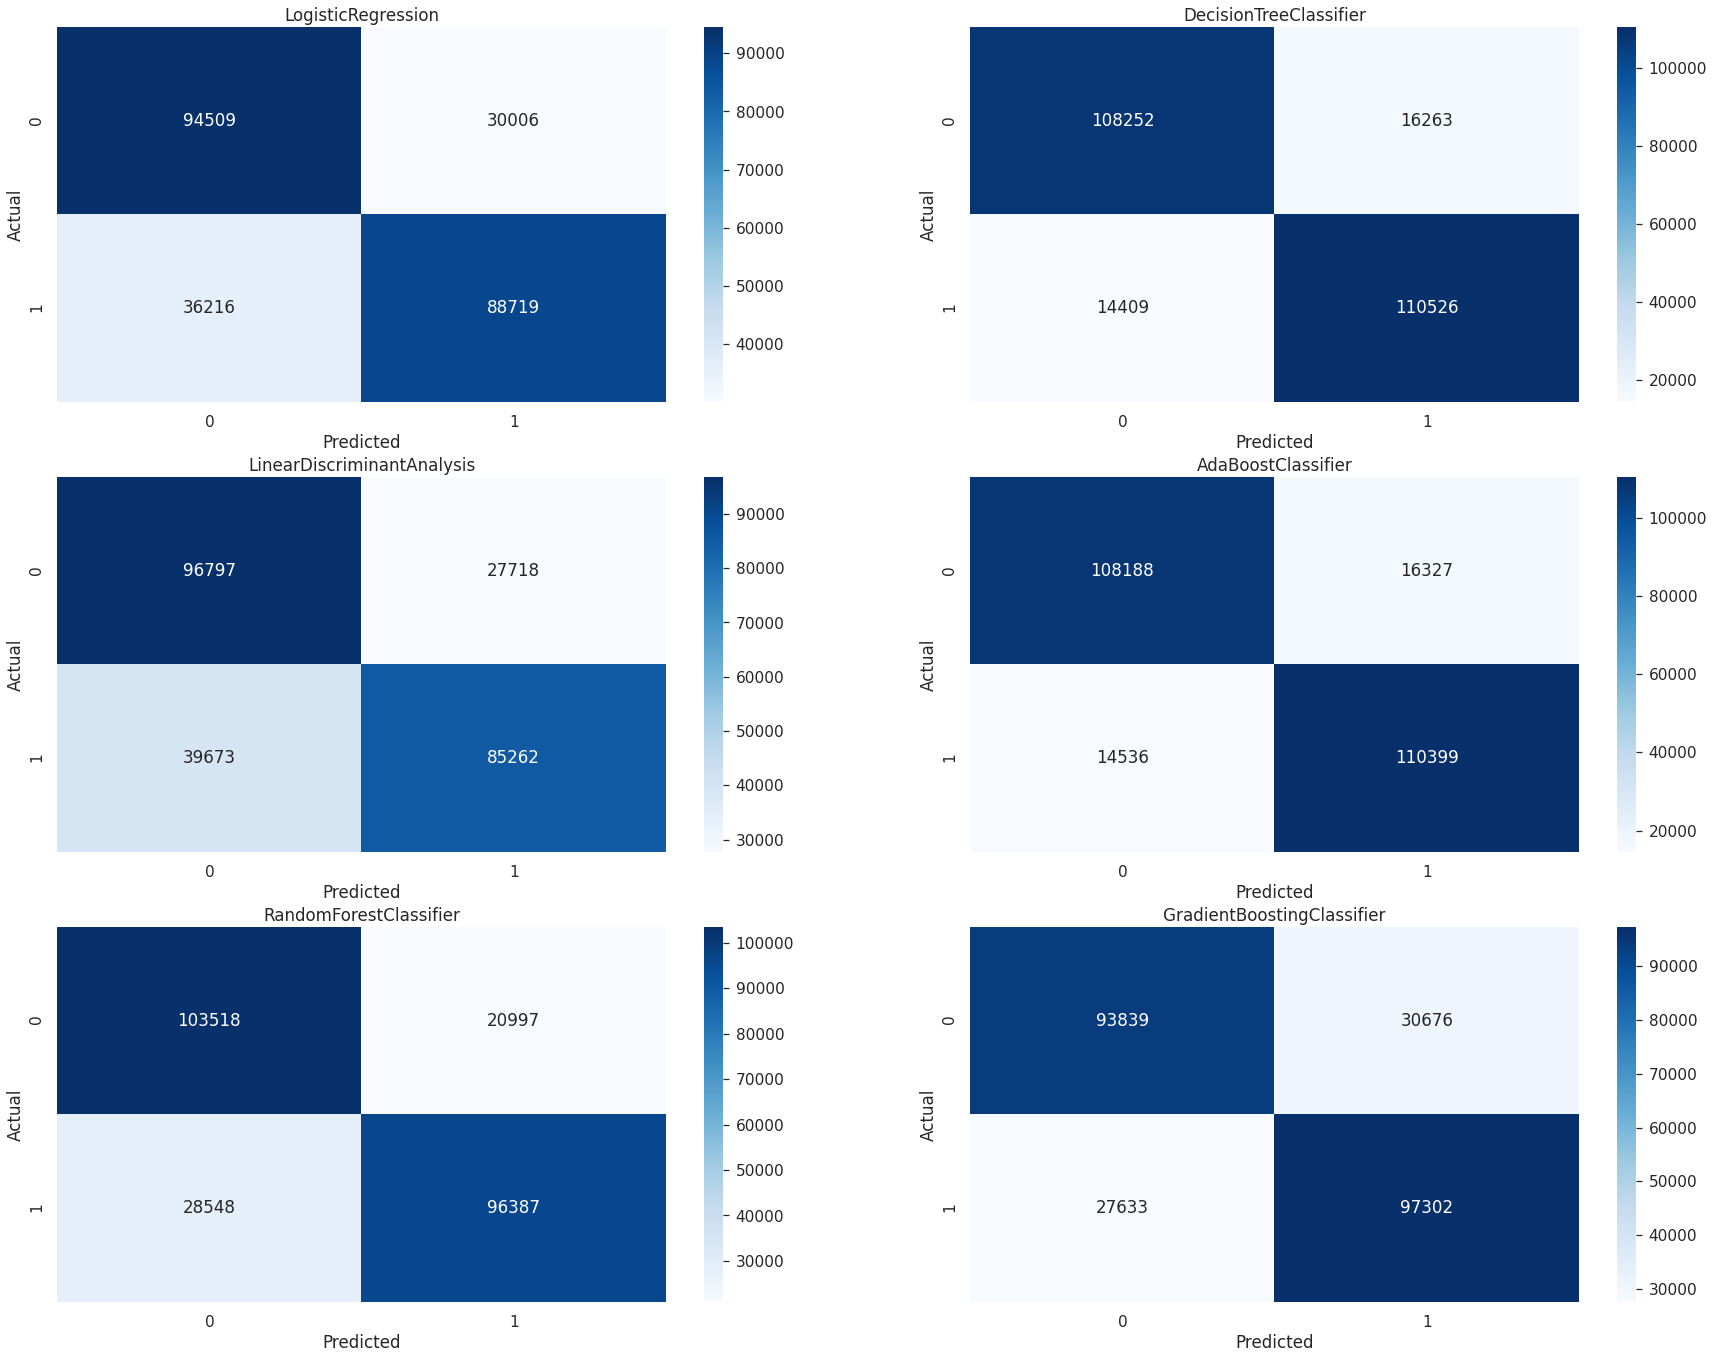

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(30,40))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(5,2,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i]) 
    plt.savefig('/content/drive/MyDrive/Progetto Python/Matrice confusione.png')

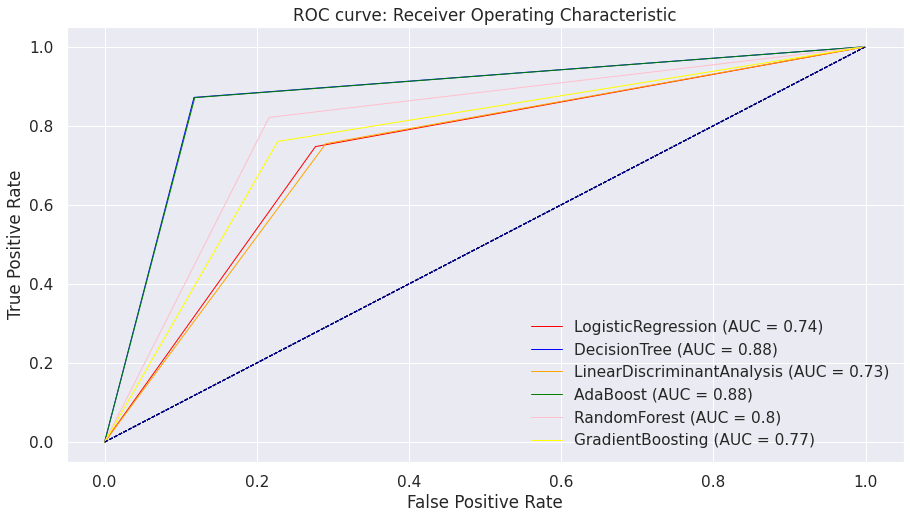

In [ ]:
# ROC Curve
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve: Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Progetto Python/Roc curve.png')

In [ ]:
dt = DecisionTreeClassifier(random_state=rs)
ab = AdaBoostClassifier((DecisionTreeClassifier(random_state=rs)), random_state=rs, learning_rate=0.1)
rf = RandomForestClassifier(n_estimators = 10, random_state=rs)

In [ ]:
dt.fit(x_train,y_train)
ab.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('ab',ab)], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print(accuracy_score(y_test,best_model.predict(x_test)))

0.8823130887953498


In [ ]:
print('Accuracy train-->',accuracy_score(y_train, best_model.predict(x_train)))

Accuracy train--> 1.0


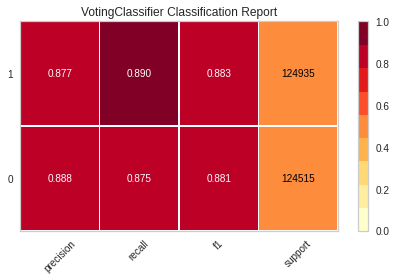

<Figure size 432x288 with 0 Axes>

In [ ]:
classes = [0,1]
visualizer = ClassificationReport(best_model, classes=classes, support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and show the figure
plt.savefig('/content/drive/MyDrive/Progetto Python/Report BestModel.png')

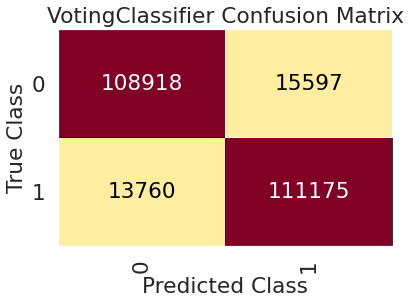

<Figure size 432x288 with 0 Axes>

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(best_model, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

# How did we do?
cm.poof()
plt.savefig('/content/drive/MyDrive/Progetto Python/Matrix confusion BestModel.png')

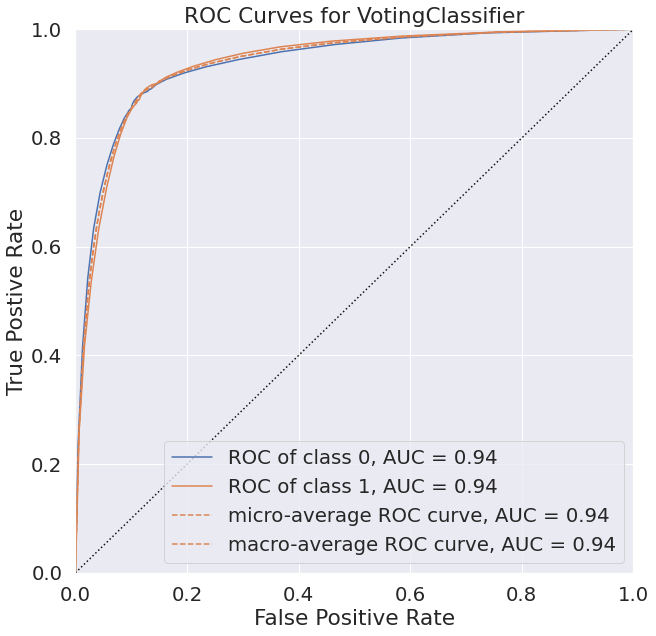

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
visualizer = ROCAUC(best_model, classes=[0, 1])
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Finalize and show the figure
plt.savefig('/content/drive/MyDrive/Progetto Python/Rocauc BestModel.png')

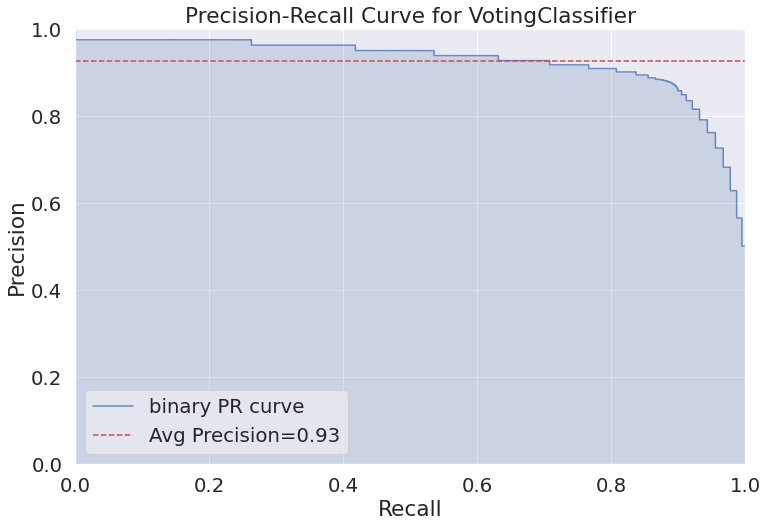

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(figsize=(12,8))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.poof()
plt.savefig('/content/drive/MyDrive/Progetto Python/Precision Recall BestModel.png')

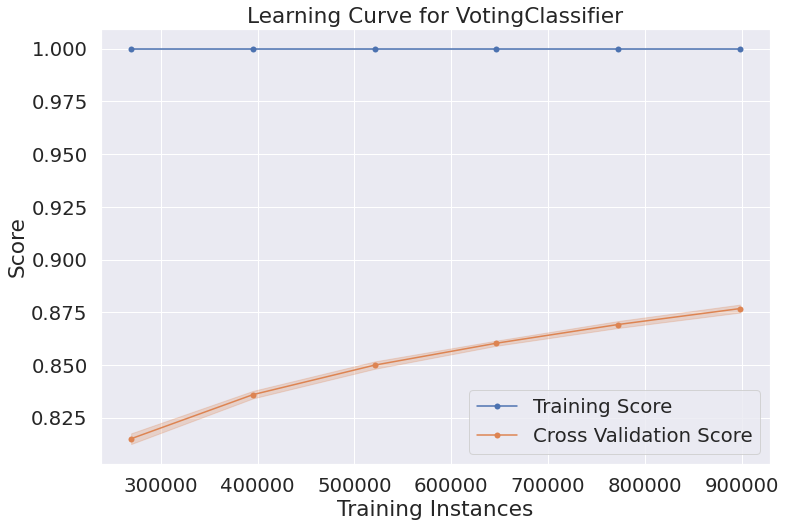

<Figure size 432x288 with 0 Axes>

In [ ]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 6)

plt.figure(figsize=(12,8))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(x_train, y_train)        # Fit the data to the visualizer
visualizer.poof()
plt.savefig('/content/drive/MyDrive/Progetto Python/Learning Curve BestModel.png')